# Approach \#2 - LSTM

## Imports

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns

## Data Fetching

In [ ]:
STOCK = "AAPL"
data = yf.download(STOCK, period="max")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600


## Data Analysis

In [ ]:
print("Check for missing values:")
print(data.isnull().sum())
print("Statistics:")
print(data.describe())
print("Data types:")
print(data.dtypes)

Check for missing values:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Statistics:
               Open          High           Low         Close     Adj Close  \
count  10985.000000  10985.000000  10985.000000  10985.000000  10985.000000   
mean      22.058441     22.296786     21.831244     22.073604     21.279287   
std       45.494774     45.986282     45.042357     45.536175     45.103738   
min        0.049665      0.049665      0.049107      0.049107      0.037900   
25%        0.297991      0.303571      0.290179      0.297991      0.242029   
50%        0.529018      0.536429      0.518214      0.529018      0.429639   
75%       20.093214     20.268213     19.878571     20.045713     17.226704   
max      231.311707    233.080002    229.250000    232.979996    232.979996   

             Volume  
count  1.098500e+04  
mean   3.183976e+08  
std    3.355240e+08  
min    0.000000e+00  
25%    1.134448e+08  
50%    2.059792

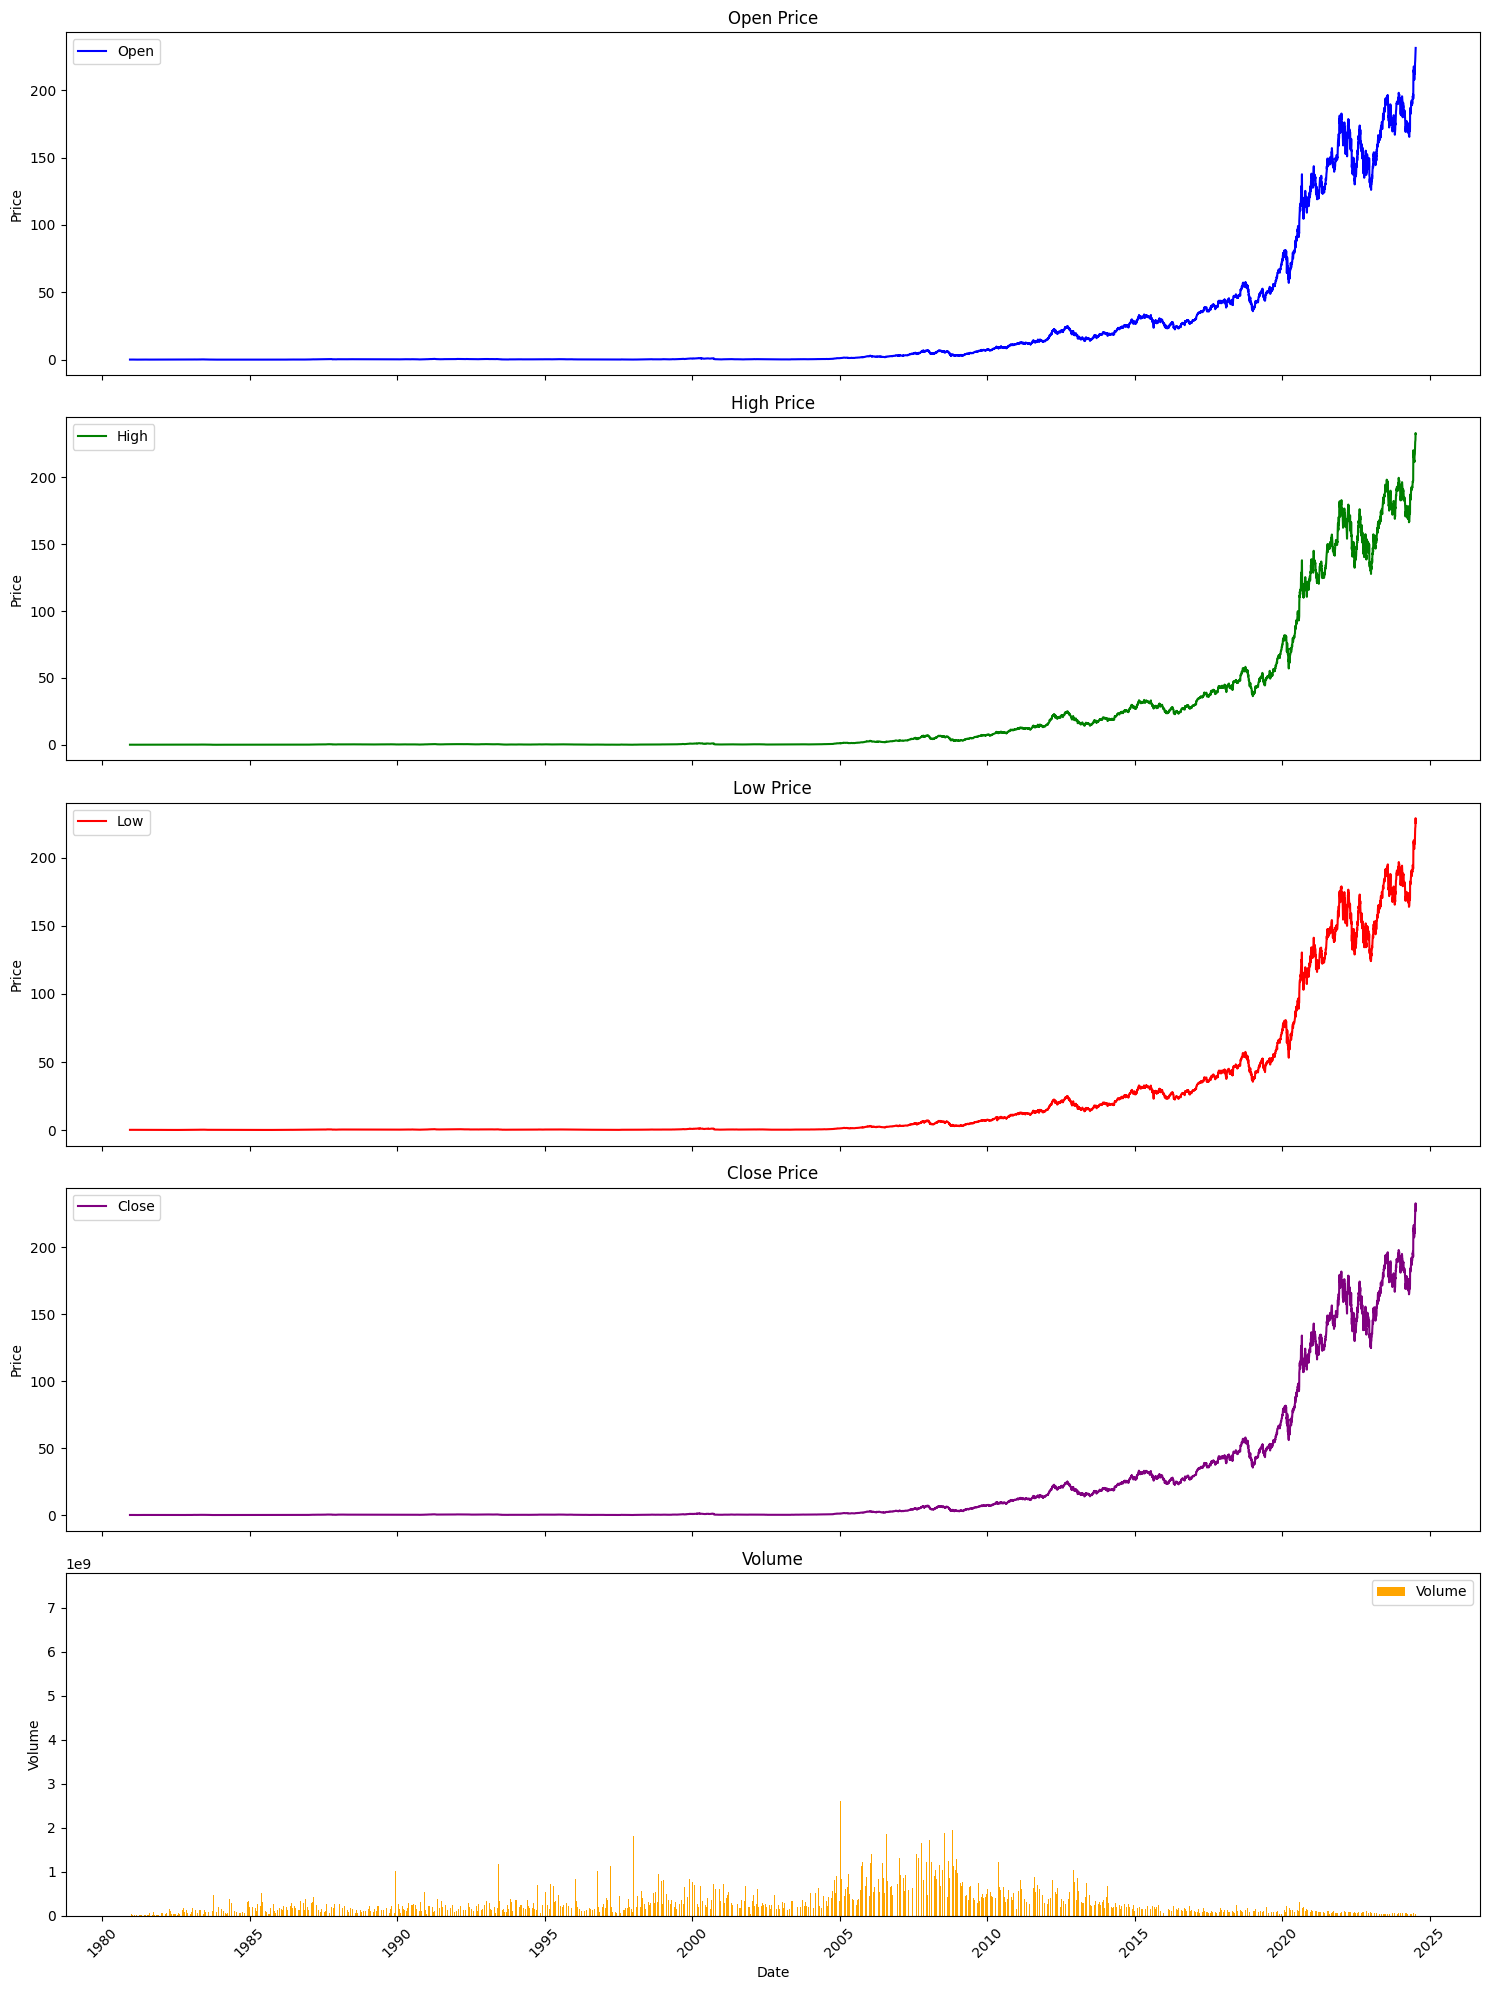

In [ ]:
fig, axs = plt.subplots(5, 1, figsize=(15, 20), sharex=True)

# Plot Open
axs[0].plot(data.index, data['Open'], label='Open', color='blue')
axs[0].set_title('Open Price')
axs[0].set_ylabel('Price')
axs[0].legend()

# Plot High
axs[1].plot(data.index, data['High'], label='High', color='green')
axs[1].set_title('High Price')
axs[1].set_ylabel('Price')
axs[1].legend()

# Plot Low
axs[2].plot(data.index, data['Low'], label='Low', color='red')
axs[2].set_title('Low Price')
axs[2].set_ylabel('Price')
axs[2].legend()

# Plot Close
axs[3].plot(data.index, data['Close'], label='Close', color='purple')
axs[3].set_title('Close Price')
axs[3].set_ylabel('Price')
axs[3].legend()

# Plot Volume
axs[4].bar(data.index, data['Volume'], label='Volume', color='orange')
axs[4].set_title('Volume')
axs[4].set_ylabel('Volume')
axs[4].legend()

plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Outliers in Open:
                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-08-02   50.145000   52.095001   50.087502   51.847500   49.287632   
2018-08-03   51.757500   52.185001   51.369999   51.997501   49.430214   
2018-08-06   52.000000   52.312500   51.767502   52.267502   49.686886   
2018-08-07   52.330002   52.375000   51.689999   51.777500   49.221081   
2018-08-08   51.512501   51.952499   51.130001   51.812500   49.254349   
...                ...         ...         ...         ...         ...   
2024-07-05  221.649994  226.449997  221.649994  226.339996  226.339996   
2024-07-08  227.089996  227.850006  223.250000  227.820007  227.820007   
2024-07-09  227.929993  229.399994  226.369995  228.679993  228.679993   
2024-07-10  229.300003  233.080002  229.250000  232.979996  232.979996   
2024-07-11  231.311707  232.389999  225.770004  227.570007  227.570007   

               Vol

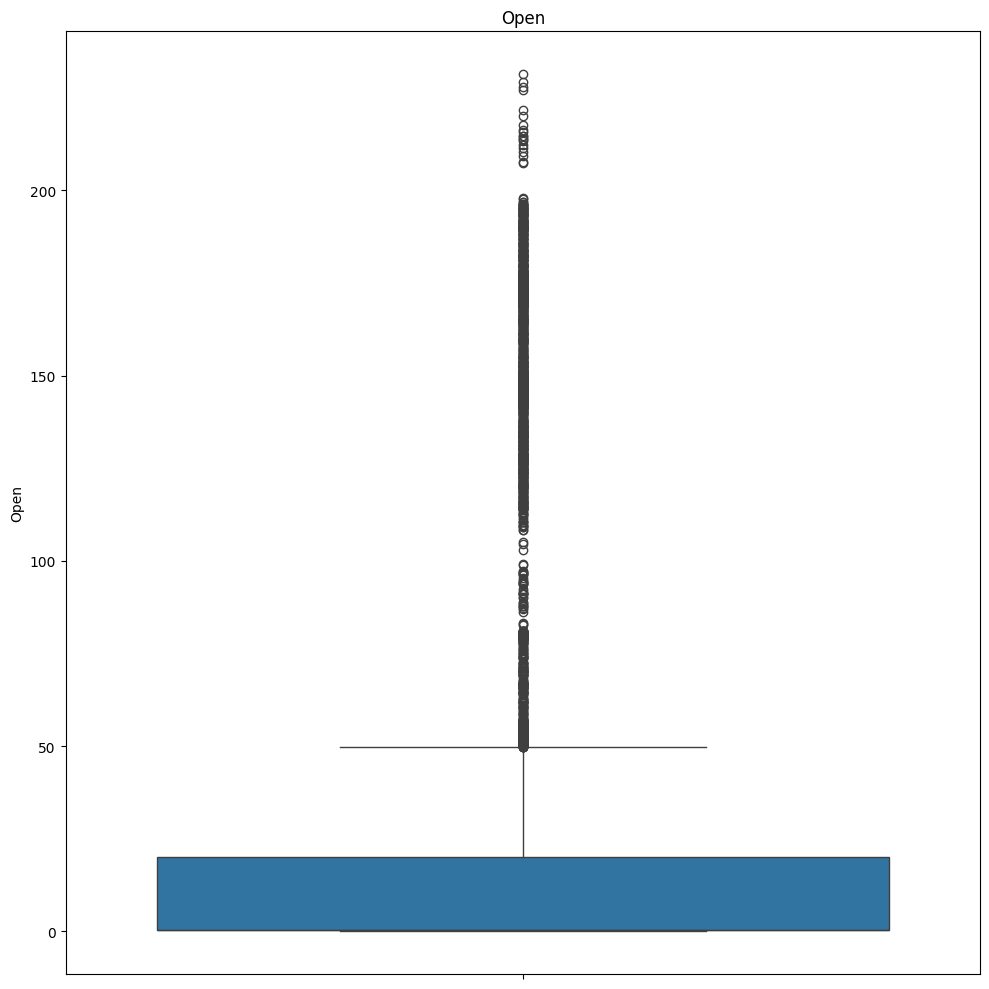

Outliers in High:
                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-08-01   49.782501   50.439999   49.327499   50.375000   47.887817   
2018-08-02   50.145000   52.095001   50.087502   51.847500   49.287632   
2018-08-03   51.757500   52.185001   51.369999   51.997501   49.430214   
2018-08-06   52.000000   52.312500   51.767502   52.267502   49.686886   
2018-08-07   52.330002   52.375000   51.689999   51.777500   49.221081   
...                ...         ...         ...         ...         ...   
2024-07-05  221.649994  226.449997  221.649994  226.339996  226.339996   
2024-07-08  227.089996  227.850006  223.250000  227.820007  227.820007   
2024-07-09  227.929993  229.399994  226.369995  228.679993  228.679993   
2024-07-10  229.300003  233.080002  229.250000  232.979996  232.979996   
2024-07-11  231.311707  232.389999  225.770004  227.570007  227.570007   

               Vol

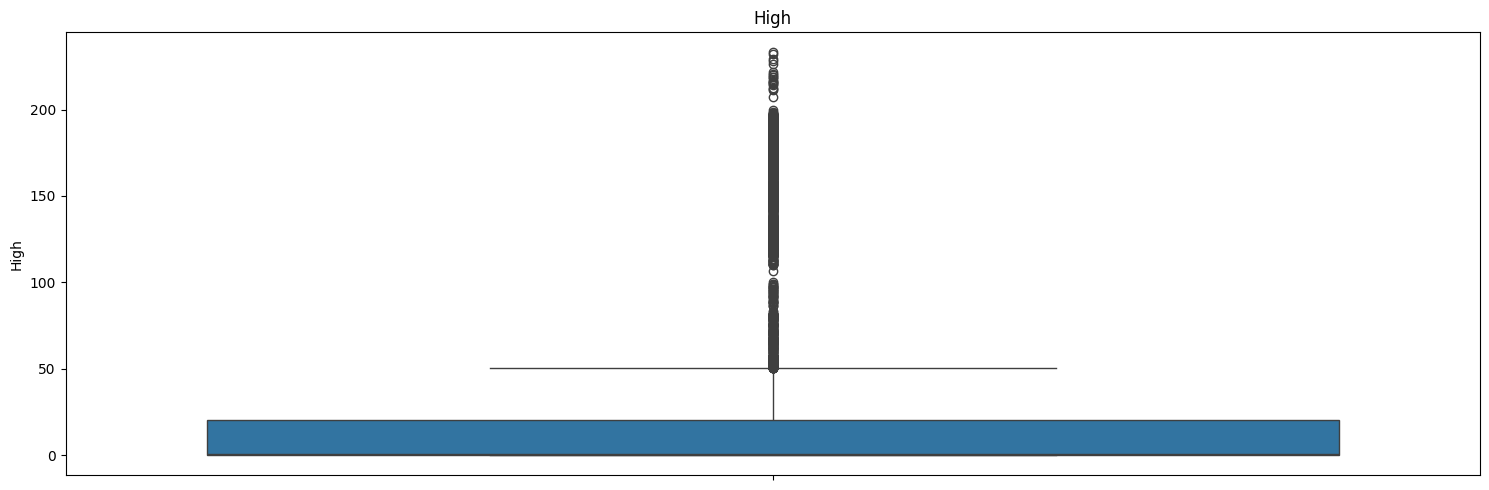

Outliers in Low:
                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-08-01   49.782501   50.439999   49.327499   50.375000   47.887817   
2018-08-02   50.145000   52.095001   50.087502   51.847500   49.287632   
2018-08-03   51.757500   52.185001   51.369999   51.997501   49.430214   
2018-08-06   52.000000   52.312500   51.767502   52.267502   49.686886   
2018-08-07   52.330002   52.375000   51.689999   51.777500   49.221081   
...                ...         ...         ...         ...         ...   
2024-07-05  221.649994  226.449997  221.649994  226.339996  226.339996   
2024-07-08  227.089996  227.850006  223.250000  227.820007  227.820007   
2024-07-09  227.929993  229.399994  226.369995  228.679993  228.679993   
2024-07-10  229.300003  233.080002  229.250000  232.979996  232.979996   
2024-07-11  231.311707  232.389999  225.770004  227.570007  227.570007   

               Volu

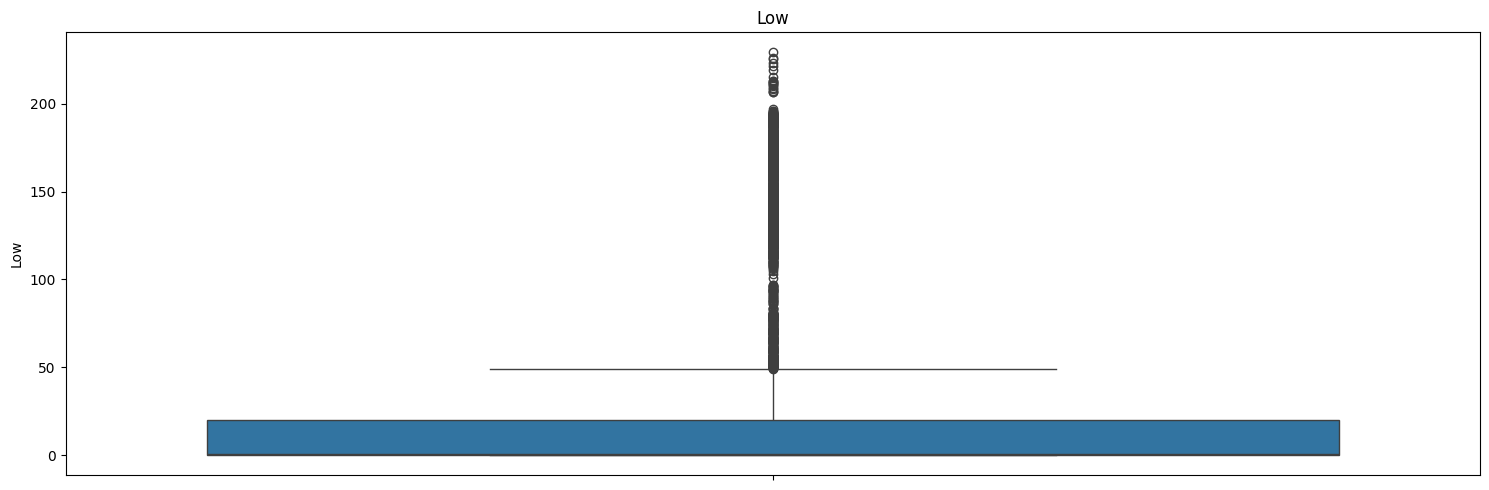

Outliers in Close:
                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-08-01   49.782501   50.439999   49.327499   50.375000   47.887817   
2018-08-02   50.145000   52.095001   50.087502   51.847500   49.287632   
2018-08-03   51.757500   52.185001   51.369999   51.997501   49.430214   
2018-08-06   52.000000   52.312500   51.767502   52.267502   49.686886   
2018-08-07   52.330002   52.375000   51.689999   51.777500   49.221081   
...                ...         ...         ...         ...         ...   
2024-07-05  221.649994  226.449997  221.649994  226.339996  226.339996   
2024-07-08  227.089996  227.850006  223.250000  227.820007  227.820007   
2024-07-09  227.929993  229.399994  226.369995  228.679993  228.679993   
2024-07-10  229.300003  233.080002  229.250000  232.979996  232.979996   
2024-07-11  231.311707  232.389999  225.770004  227.570007  227.570007   

               Vo

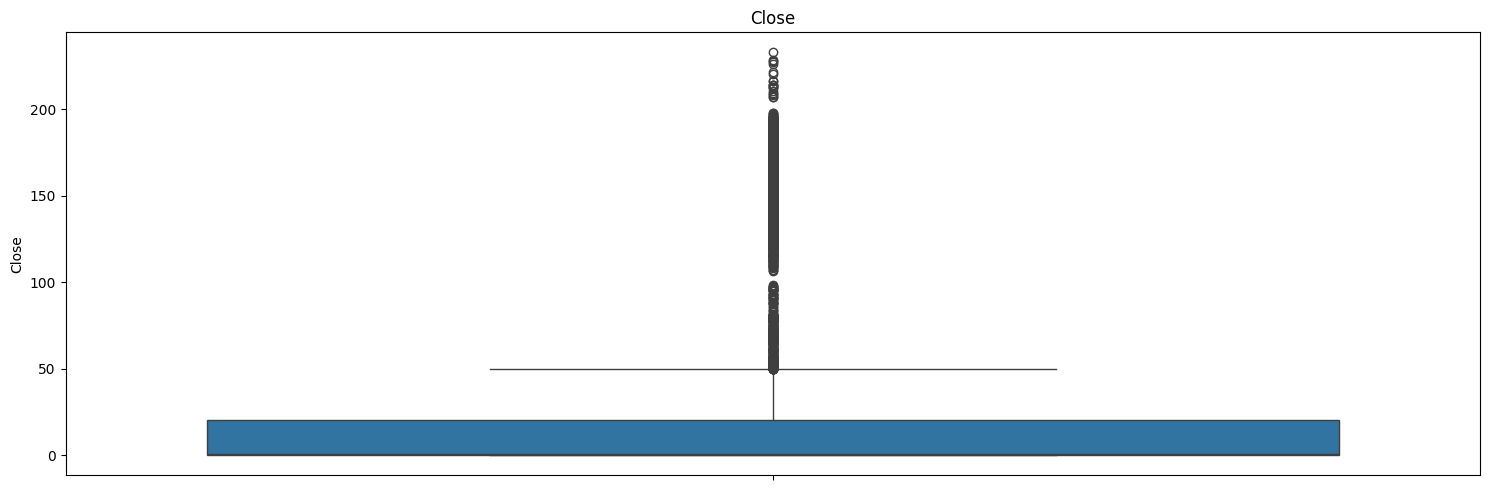

Outliers in Volume:
                  Open       High        Low      Close  Adj Close      Volume
Date                                                                         
1983-09-23   0.111607   0.111607   0.099330   0.108259   0.083553  2832345600
1983-11-08   0.087054   0.087054   0.077009   0.079799   0.061588  1221516800
1986-03-20   0.125000   0.132254   0.125000   0.126116   0.097335   904131200
1986-11-25   0.169643   0.180246   0.169643   0.179688   0.138681   848960000
1989-01-27   0.341518   0.350446   0.323661   0.335938   0.262786  2127171200
...               ...        ...        ...        ...        ...         ...
2013-04-17  15.009643  15.021429  14.218214  14.385714  12.341965   945056000
2013-04-24  14.055000  14.830357  14.017857  14.480714  12.423465   969651200
2013-08-13  16.819286  17.666430  16.716070  17.484644  15.199626   881941200
2013-09-11  16.678928  16.917500  16.600357  16.703930  14.520939   898696400
2014-01-28  18.170000  18.392857  17.931070

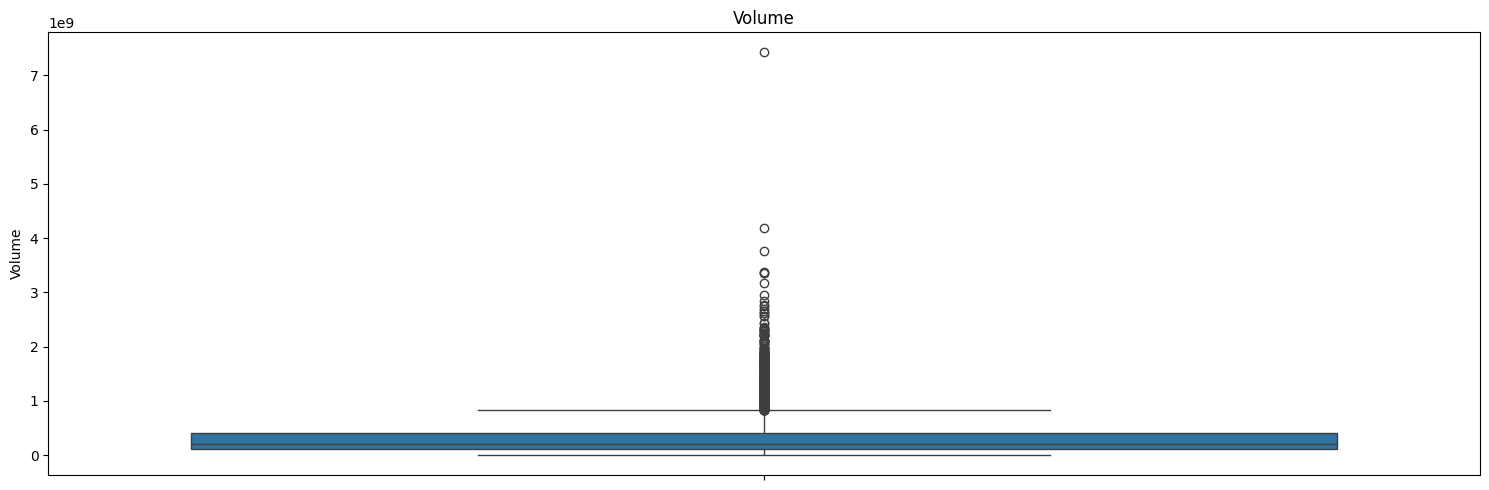

In [ ]:
import seaborn as sns

def detect_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

plt.figure(figsize=(10, 10))
price_columns = ['Open', 'High', 'Low', 'Close', "Volume"]
for i, column in enumerate(price_columns):
    outliers = detect_outliers(column)
    if not outliers.empty:
      print(f"Outliers in {column}:\n", outliers)
      sns.boxplot(data[column])
      plt.title(f'{column.capitalize()}')
      plt.tight_layout()
      plt.show()

In [ ]:
data.index = pd.to_datetime(data.index)

# Define the cutoff date
cutoff_date = '2012-01-01'

# Filter the DataFrame
filtered_df = data[data.index >= cutoff_date]

Outliers in Volume:
                  Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2012-01-24  15.182143  15.182143  14.983929  15.014643  12.694170  547638000
2012-01-25  16.230000  16.230356  15.847500  15.952143  13.486786  958314000
2012-02-09  17.170000  17.741072  17.162857  17.613214  14.891137  884214800
2012-02-10  17.534286  17.772142  17.448214  17.622143  14.898686  631302000
2012-02-13  17.840357  17.993929  17.753214  17.950001  15.175879  517216000
...               ...        ...        ...        ...        ...        ...
2015-08-24  23.717501  27.200001  23.000000  25.780001  23.308500  648825200
2016-01-27  24.010000  24.157499  23.334999  23.355000  21.206373  533478800
2016-04-27  24.000000  24.677500  23.920000  24.455000  22.325661  458408400
2016-09-14  27.182501  28.257500  27.150000  27.942499  25.803843  443554800
2017-02-01  31.757500  32.622501  31.752501  32.187500 

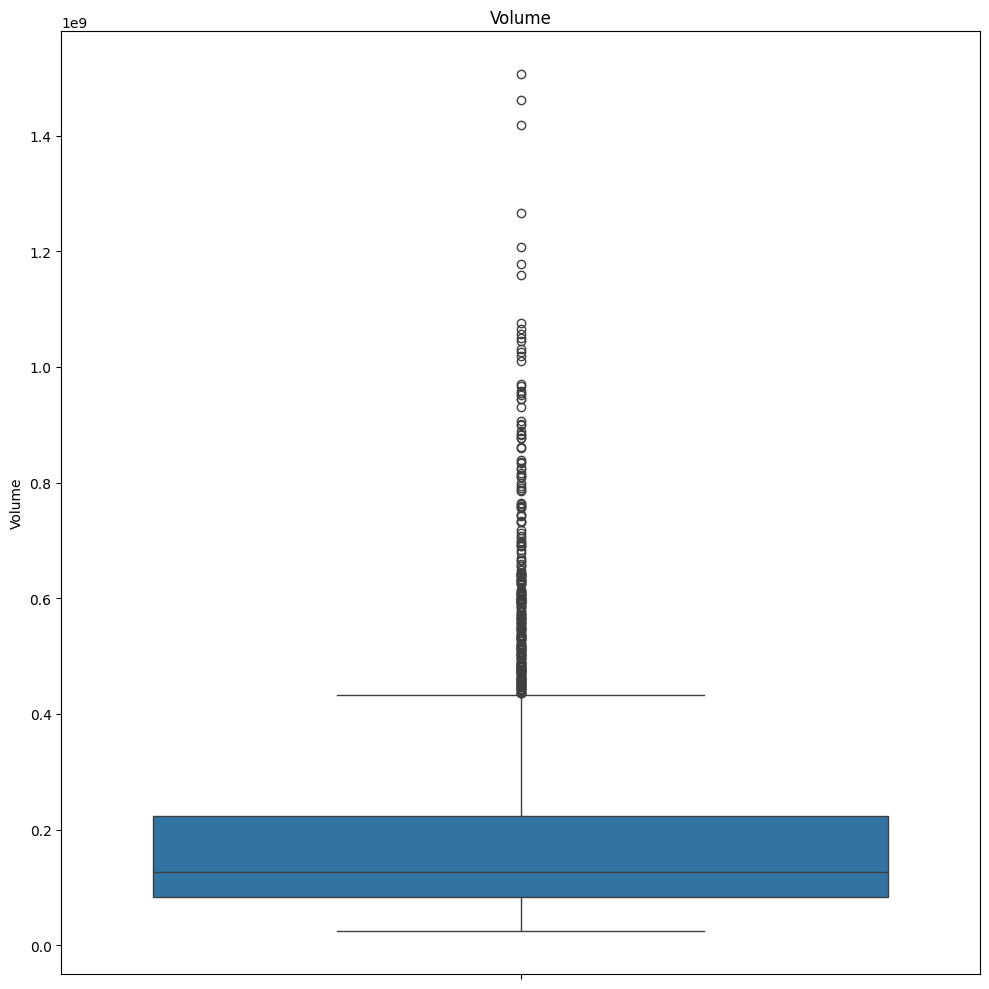

In [ ]:
import seaborn as sns

def detect_outliers(column):
    Q1 = filtered_df[column].quantile(0.25)
    Q3 = filtered_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return filtered_df[(filtered_df[column] < lower_bound) | (filtered_df[column] > upper_bound)]

plt.figure(figsize=(10, 10))
price_columns = ['Open', 'High', 'Low', 'Close', "Volume"]
for i, column in enumerate(price_columns):
    outliers = detect_outliers(column)
    if not outliers.empty:
      print(f"Outliers in {column}:\n", outliers)
      sns.boxplot(filtered_df[column])
      plt.title(f'{column.capitalize()}')
      plt.tight_layout()
      plt.show()

In [ ]:
data = filtered_df

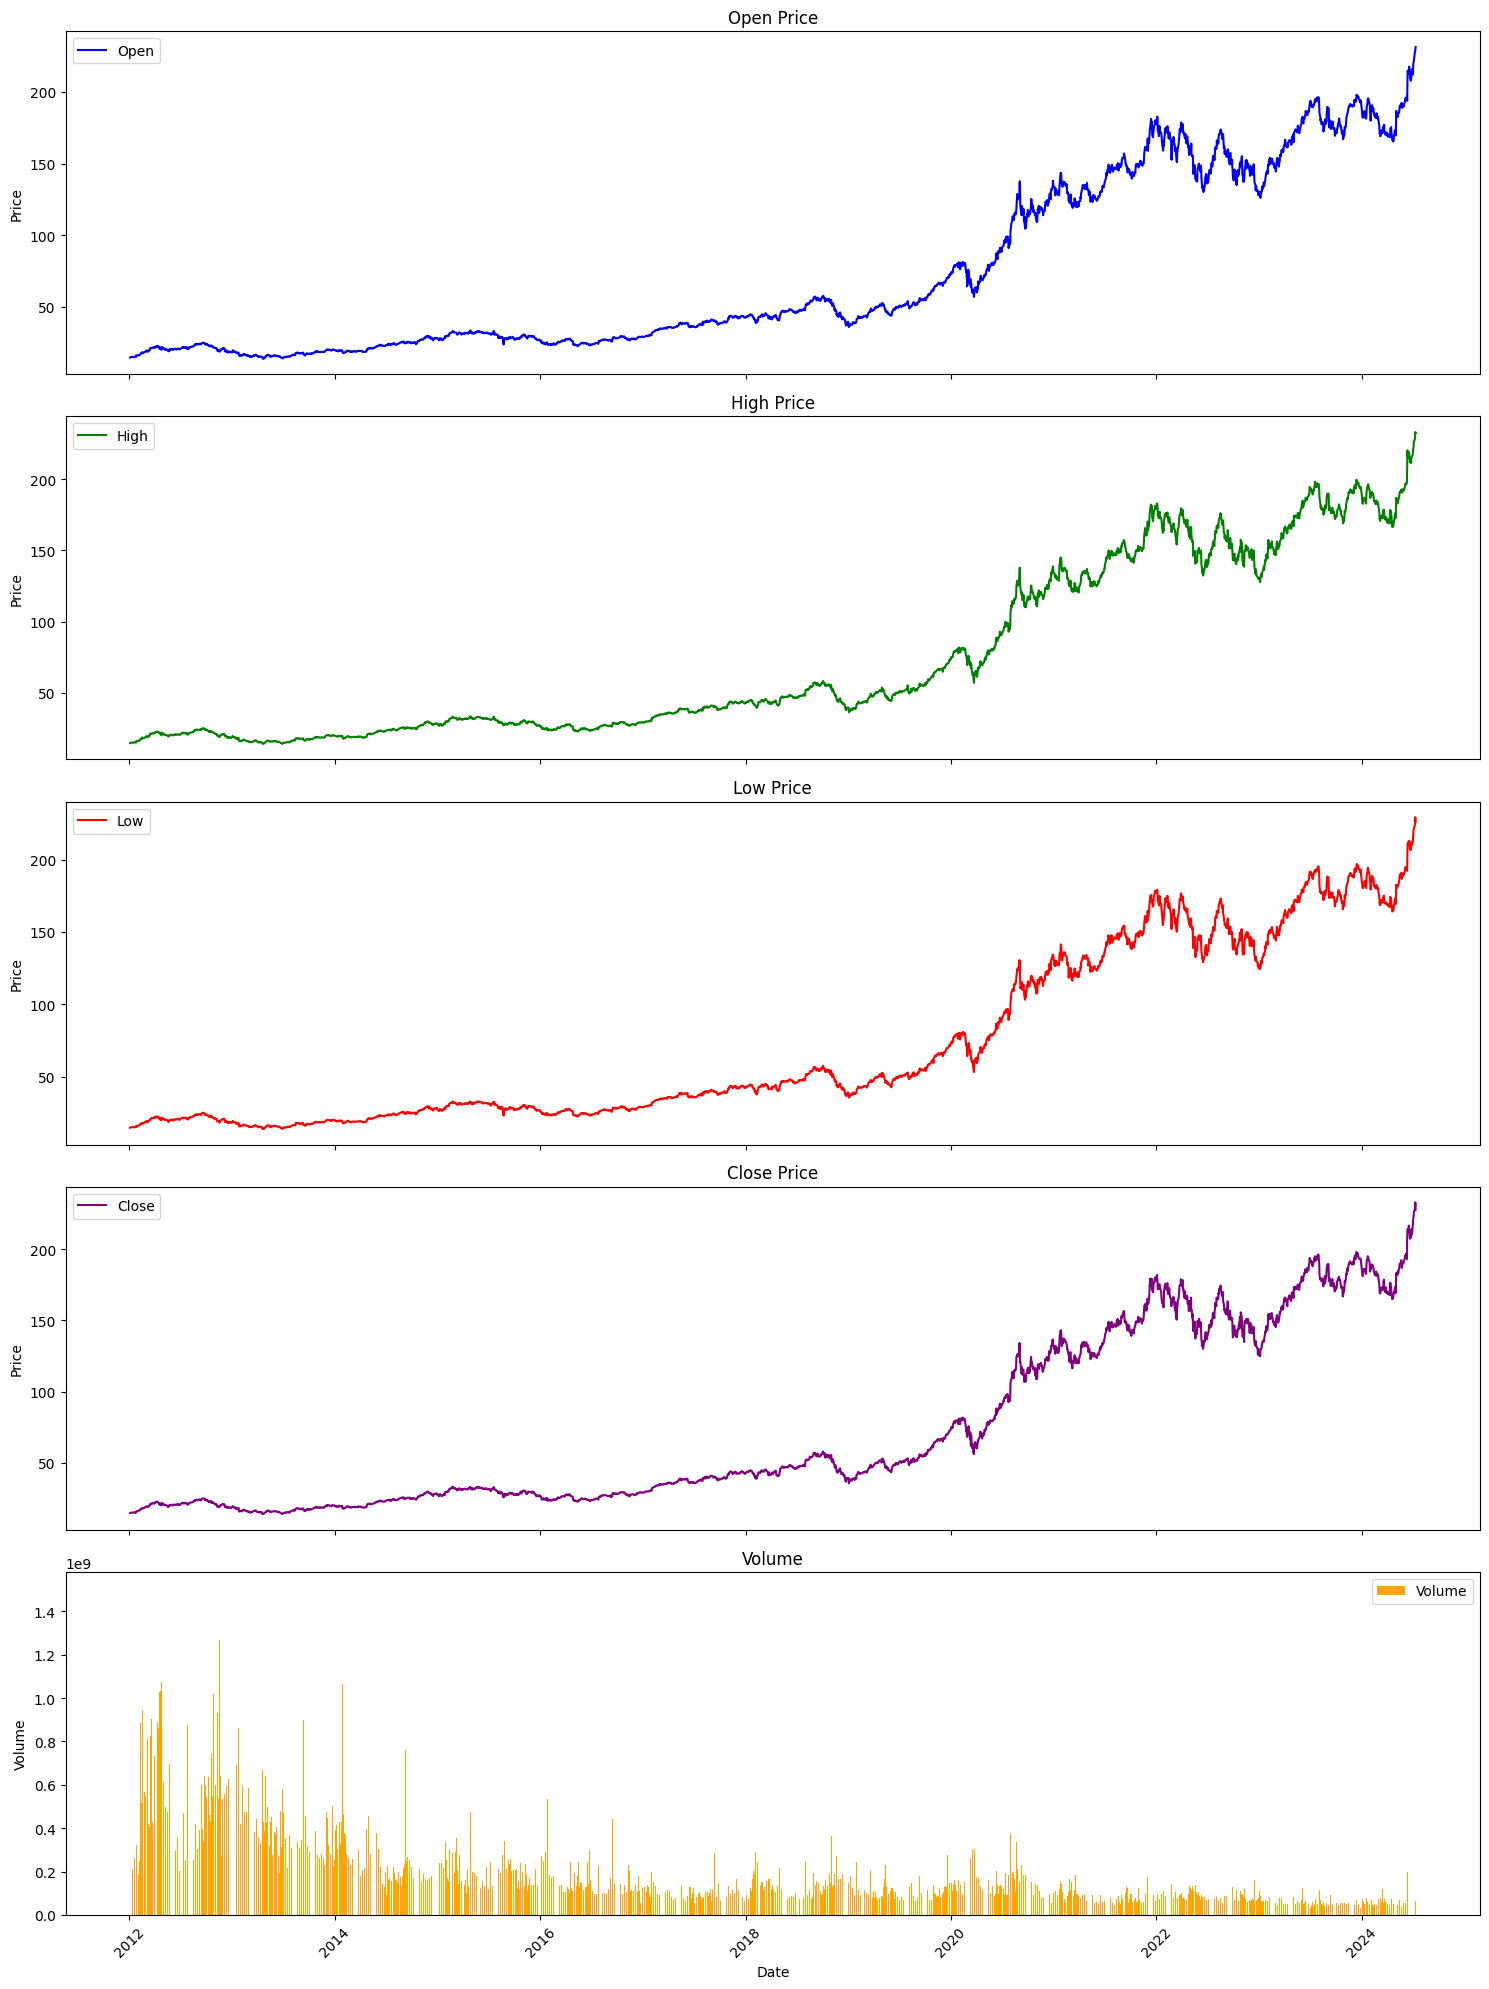

In [ ]:
fig, axs = plt.subplots(5, 1, figsize=(15, 20), sharex=True)

# Plot Open
axs[0].plot(data.index, data['Open'], label='Open', color='blue')
axs[0].set_title('Open Price')
axs[0].set_ylabel('Price')
axs[0].legend()

# Plot High
axs[1].plot(data.index, data['High'], label='High', color='green')
axs[1].set_title('High Price')
axs[1].set_ylabel('Price')
axs[1].legend()

# Plot Low
axs[2].plot(data.index, data['Low'], label='Low', color='red')
axs[2].set_title('Low Price')
axs[2].set_ylabel('Price')
axs[2].legend()

# Plot Close
axs[3].plot(data.index, data['Close'], label='Close', color='purple')
axs[3].set_title('Close Price')
axs[3].set_ylabel('Price')
axs[3].legend()

# Plot Volume
axs[4].bar(data.index, data['Volume'], label='Volume', color='orange')
axs[4].set_title('Volume')
axs[4].set_ylabel('Volume')
axs[4].legend()

plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
data['year'] = data.index.year
data['month'] = data.index.month

yearly_data = {}
for year in range(2012, 2025):
  df_year = data[data['year'] == year]
  result = df_year.groupby(['month']).agg(
      open=('Open', 'first'),
      high=('High', 'max'),
      low=('Low', 'min'),
      close=('Close', 'last')
  ).reset_index()
  yearly_data[year] = result

<ipython-input-229-7f8ffc6e194c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data.index.year
<ipython-input-229-7f8ffc6e194c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data.index.month


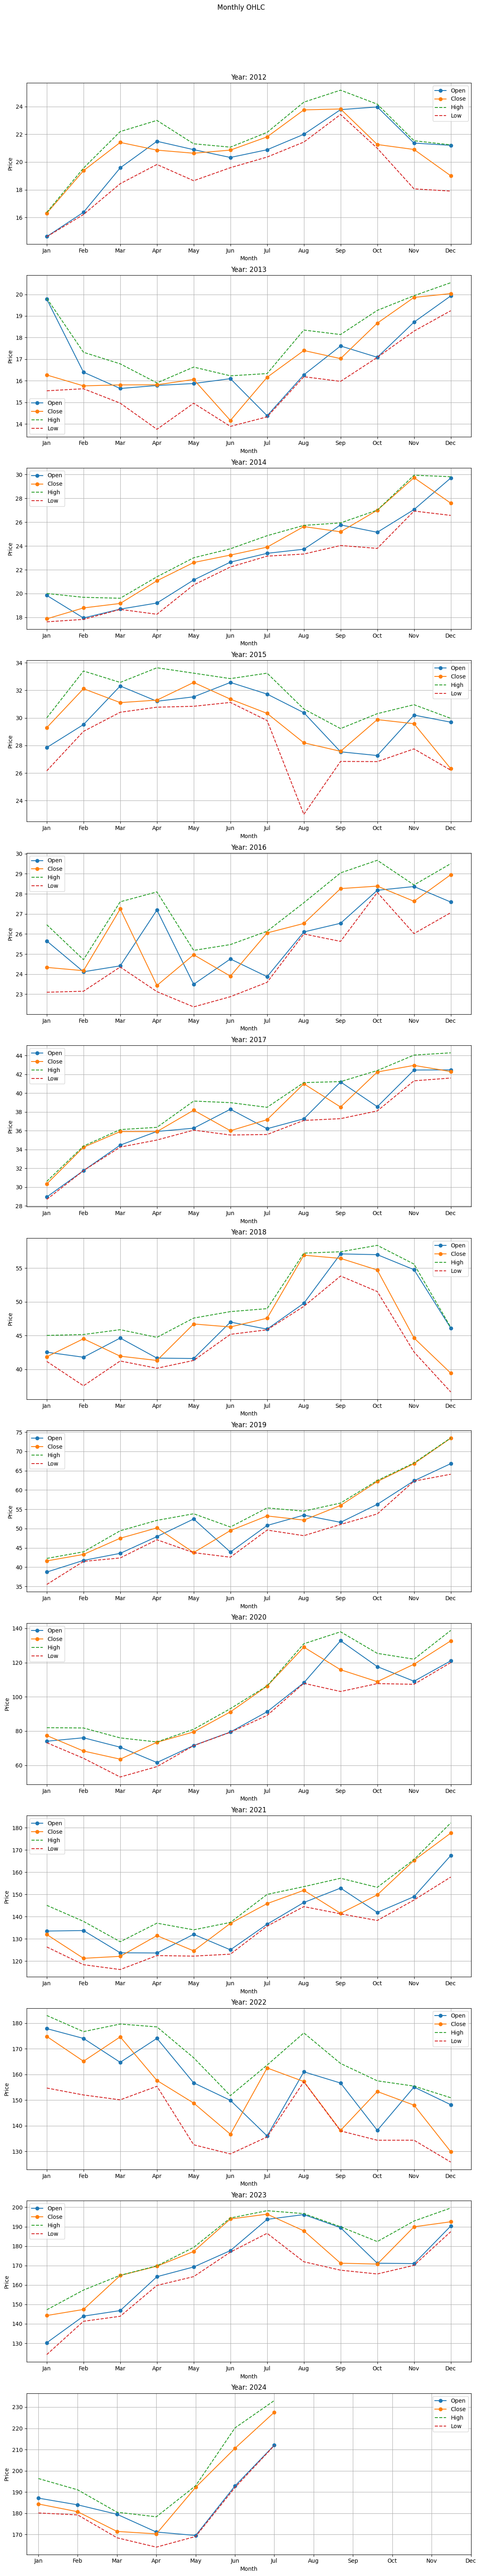

In [ ]:
years = list(yearly_data.keys())
num_plots = len(yearly_data)
fig, axes = plt.subplots(num_plots, 1, figsize=(12, num_plots*5))
fig.suptitle(f' Monthly OHLC')
for i, year in enumerate(years):
    ax = axes[i]
    result = yearly_data[year]
    ax.plot(result['month'], result['open'], label='Open', marker='o')
    ax.plot(result['month'], result['close'], label='Close', marker='o')
    ax.plot(result['month'], result['high'], label='High', linestyle='--')
    ax.plot(result['month'], result['low'], label='Low', linestyle='--')
    ax.set_title(f'Year: {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Price')
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.legend()
    ax.grid(True)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

# Preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

data['Close'] = scaler.fit_transform(data[['Close']])

<ipython-input-231-fb292134bce8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close'] = scaler.fit_transform(data[['Close']])


In [ ]:
train_data = data.query('Date <  "2020-01-01"').reset_index(drop = False)
test_data  = data.query('Date >= "2020-01-01"').reset_index(drop = False)

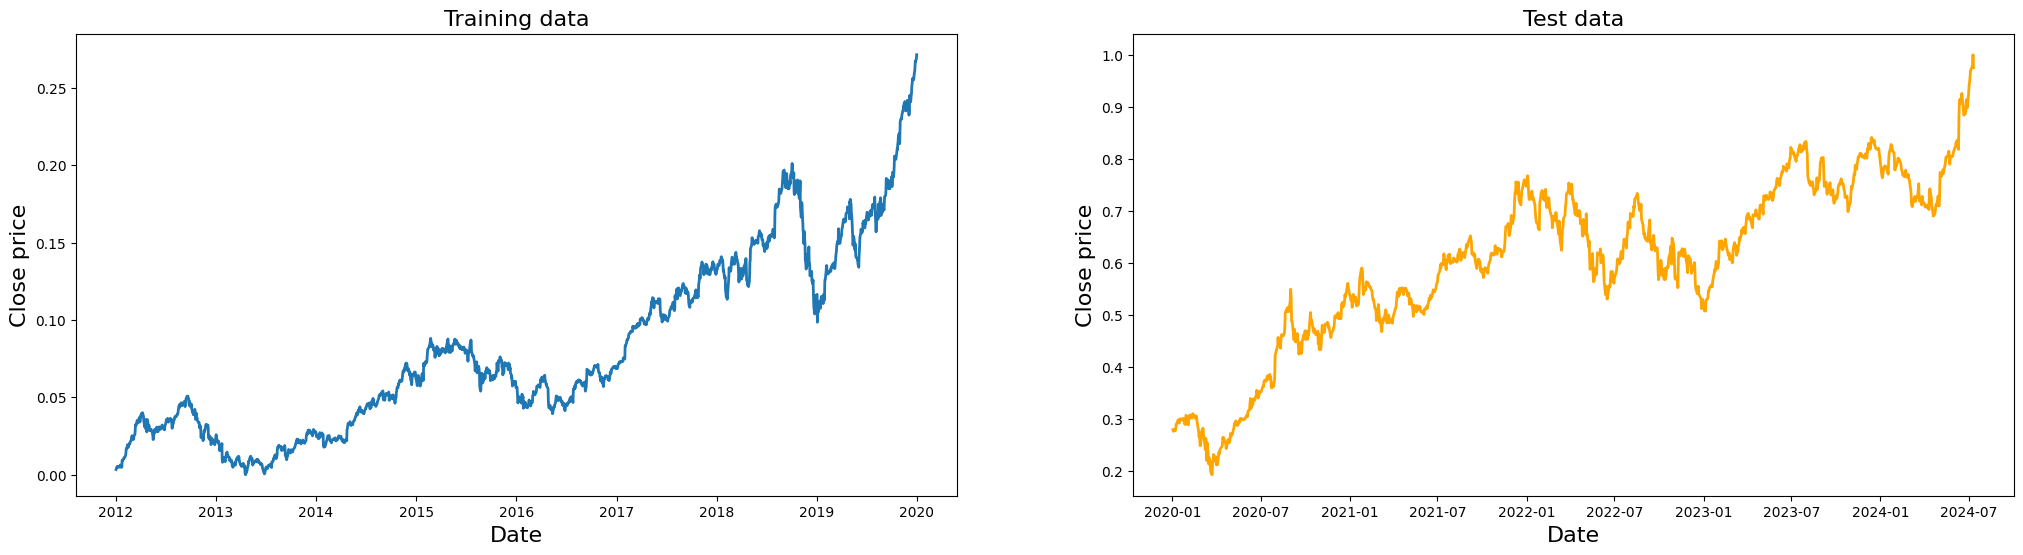

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 6))

ax1.plot(train_data.Date, train_data['Close'], lw=2)
ax1.set_xlabel("Date", fontsize=16)
ax1.set_ylabel("Close price", fontsize=16)
ax1.set_title("Training data", fontsize=16)

ax2.plot(test_data.Date, test_data['Close'], c='orange', lw=2)
ax2.set_xlabel("Date", fontsize=16)
ax2.set_ylabel("Close price", fontsize=16)
ax2.set_title("Test data", fontsize=16);

## Model

In [ ]:
X_train = train_data.Date
y_train = train_data['Close']

X_test = test_data.Date
y_test = test_data['Close']

n_features = 1

train_series = y_train.values.reshape((len(y_train), n_features))
test_series  = y_test.values.reshape((len(y_test), n_features))

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

look_back = 30

train_generator = TimeseriesGenerator(train_series, train_series,
                                      length        = look_back,
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 10)

test_generator = TimeseriesGenerator(test_series, test_series,
                                      length        = look_back,
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 10)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(30, return_sequences=True, input_shape= (look_back, 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(train_generator,epochs=3);

Epoch 1/3
199/199 [==============================] - 15s 53ms/step - loss: 3.5878e-04
Epoch 2/3
199/199 [==============================] - 7s 37ms/step - loss: 1.1641e-04
Epoch 3/3
199/199 [==============================] - 9s 44ms/step - loss: 1.2527e-04


In [ ]:
test_predictions  = model.predict(test_generator)

111/111 [==============================] - 1s 12ms/step


array([[0.29291558],
       [0.29387674],
       [0.2942363 ],
       ...,
       [0.94409716],
       [0.95444024],
       [0.96588933]], dtype=float32)

In [ ]:
test_data['Close'] = scaler.inverse_transform(test_data[['Close']])
test_predictions = scaler.inverse_transform(test_predictions)

## Results?

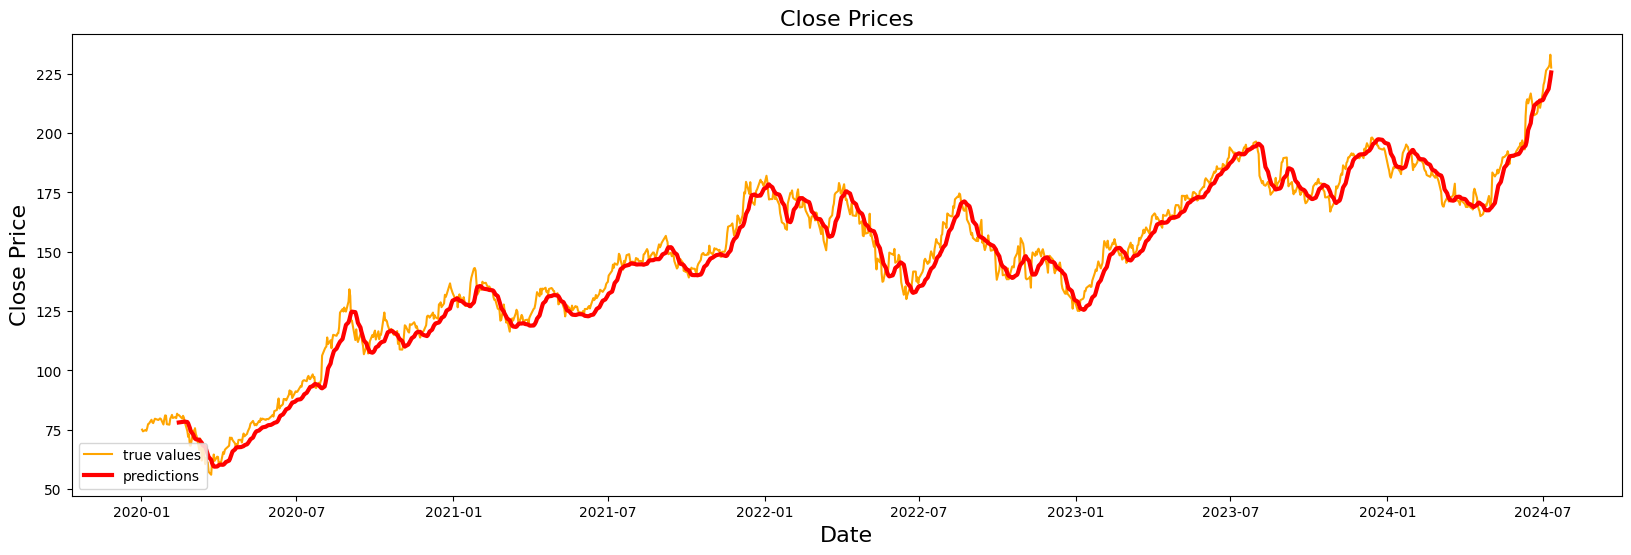

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(test_data.Date, test_data['Close'], c='orange',label='true values')
plt.plot(X_test[30:],test_predictions, lw=3, c='r',linestyle = '-', label='predictions')
plt.legend(loc="lower left")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Close Price", fontsize=16)
plt.title("Close Prices", fontsize=16);

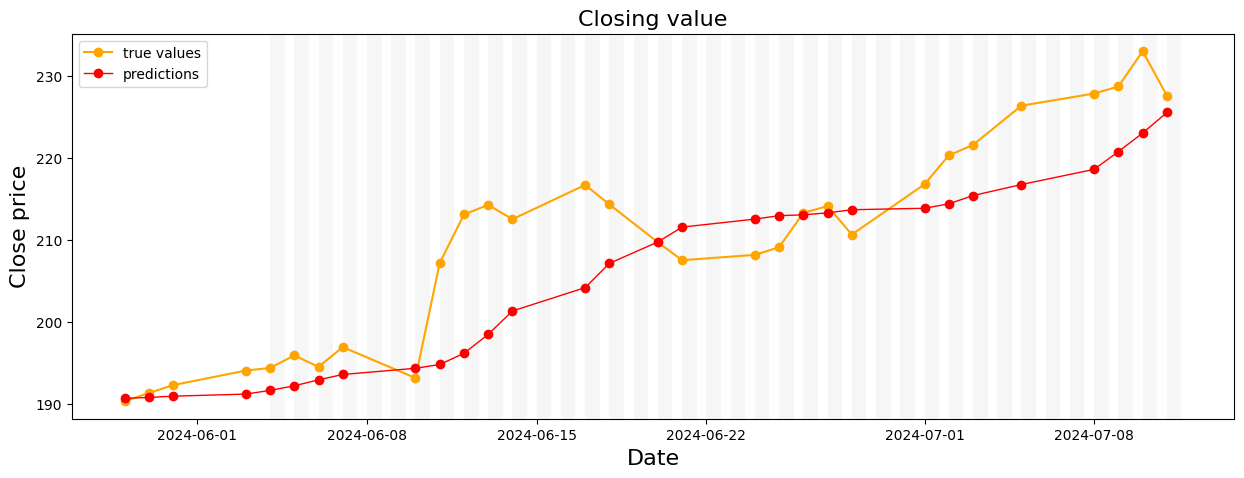

In [ ]:
n_days = 30
last_n_days = len(test_data)-n_days

plt.figure(figsize=(15,5))
plt.plot(test_data.Date[last_n_days:], test_data['Close'][last_n_days:], c='orange',marker='o',label='true values')
plt.plot(X_test[last_n_days:],test_predictions[last_n_days-30:],lw=1, c='r', marker='o', label='predictions')
plt.legend(loc="upper left")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Close price", fontsize=16)
plt.title("Closing value", fontsize=16)

# date2 = data.tail(1).index.item()
# date1 = date2 - pd.Timedelta(days=n_days+7)
# for i in pd.date_range(date1, date2, periods=n_days+8):
#     plt.axvspan(i,i+pd.Timedelta(days=0.6), facecolor='lightgrey', alpha=0.2)
# plt.show();

## Results

In [ ]:
extrapolation = list()
seed_batch    = y_test[:look_back].values.reshape((1,look_back, n_features))
current_batch = seed_batch

for i in range(len(test_data)):
    predicted_value = model.predict(current_batch)[0]
    extrapolation.append(predicted_value)
    current_batch = np.append(current_batch[:,1:,:],[[predicted_value]],axis=1)

NameError: name 'y_test' is not defined

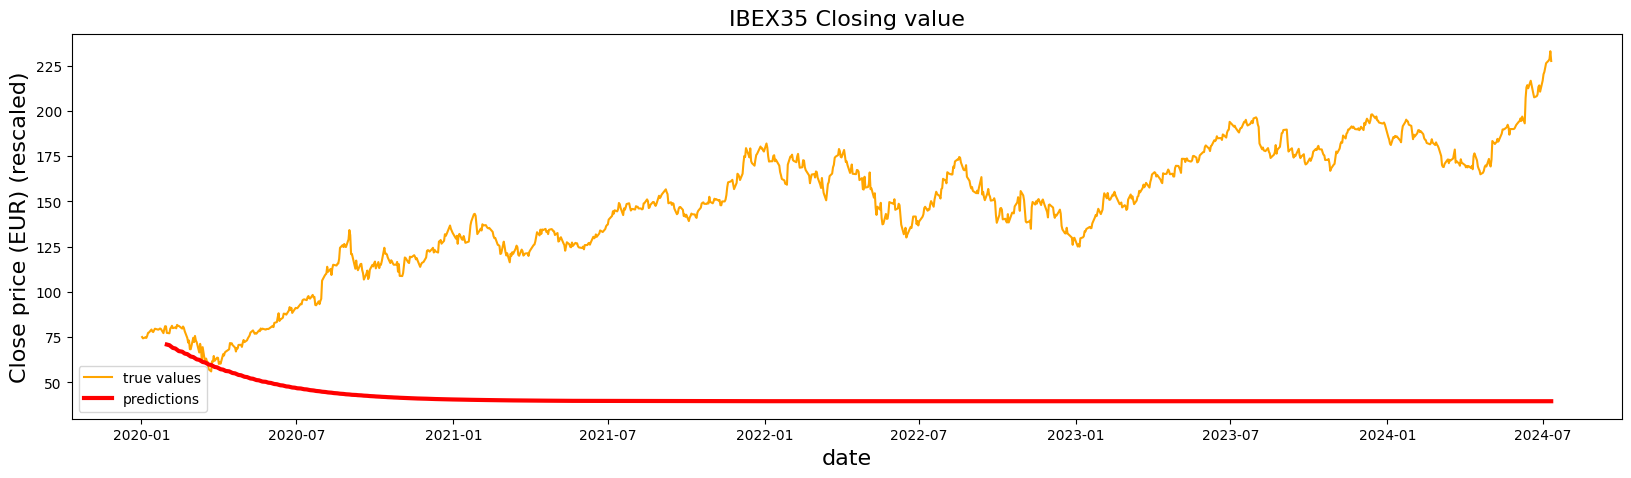

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(test_data.Date, test_data['Close'], c='orange',label='true values')
plt.plot(X_test[20:],scaler.inverse_transform(extrapolation[20:]), lw=3, c='r',linestyle = '-', label='predictions')
plt.legend(loc="lower left")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Close price", fontsize=16)
plt.title("Close prices", fontsize=16);

# The Stock Market

In [ ]:
train_data['pct_change'] = train_data.Close.pct_change(periods = 1)

# x = np.arange(-0.1, 0.1, 0.001)

# def Gaussian(x,mu,sigma,A):
#     return A*np.exp(-0.5 * ((x-mu)/sigma)**2)

plt.figure(figsize = (15,5))
ax = sns.histplot(train_data['pct_change'], binwidth=0.0075)
# ax = plt.plot(x,Gaussian(x,0,0.018,140),color='r',lw=3,label='Gaussian #1', alpha=0.8)
plt.title("Histogram of the daily percentage change in the 'Close' value for the training data", size=14)
plt.xlim(-0.12, 0.12);

NameError: name 'train_data' is not defined

## The Best Model?

In [ ]:
# create a naïve forecast
test_data['naive'] = test_data['Close'].shift(1)

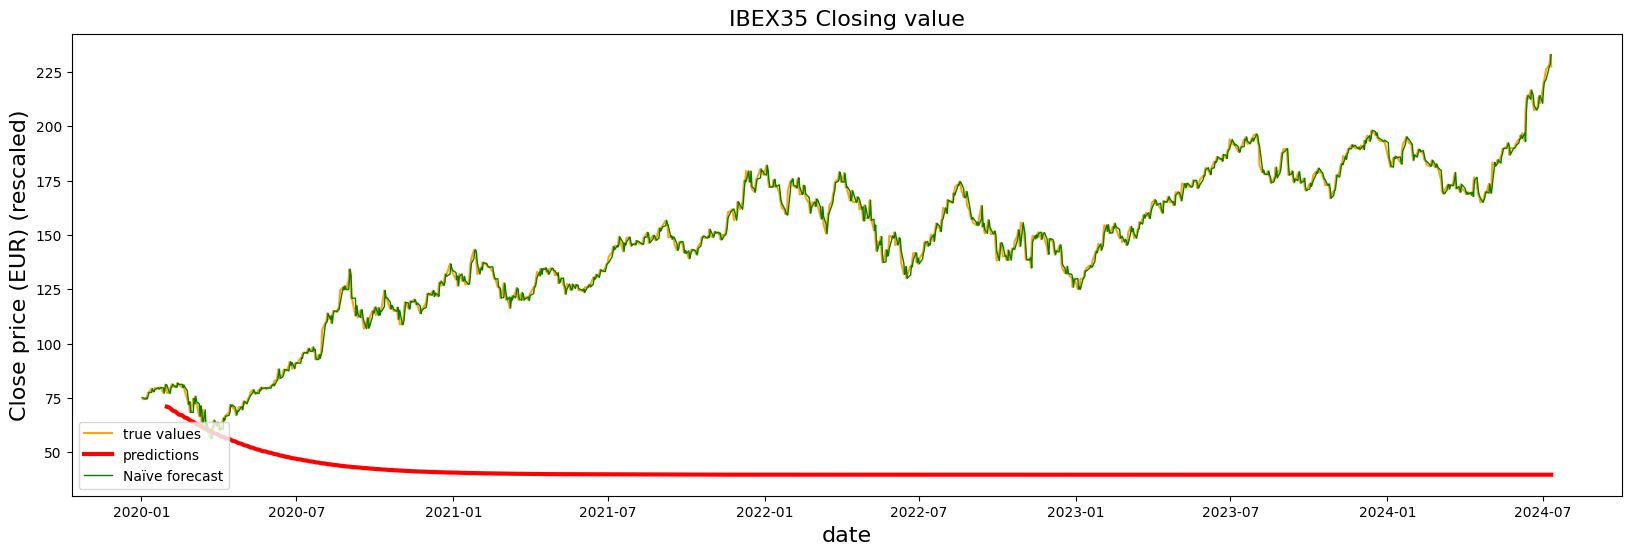

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(test_data.Date, test_data['Close'], c='orange',label='true values')
plt.plot(X_test[20:],scaler.inverse_transform(extrapolation[20:]), lw=3, c='r',linestyle = '-', label='predictions')
plt.plot(test_data.Date,test_data['naive'], lw=1, c='green',linestyle = '-', label='Naïve forecast')
plt.legend(loc="lower left")
plt.xlabel("date", fontsize=16)
plt.ylabel("Close price (EUR) (rescaled)", fontsize=16)
plt.title("IBEX35 Closing value", fontsize=16);

## Results pt. II

In [ ]:
# first create a pad of length "look_back"
twenty_zeros = np.zeros((look_back,1))
# now insert the LSTM predictions into the dataframe
test_data["LSTM"] = np.concatenate([twenty_zeros,test_predictions])

from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

print("Naïve model MSE: %.4f" % mean_squared_error(test_data[20:]["Close"], test_data[20:]["naive"]))
print("LSTM model  MSE: %.4f" % mean_squared_error(test_data[20:]["Close"], test_data[20:]["LSTM"]))
print("Naïve model MAE: %.4f" % median_absolute_error(test_data[20:]["Close"], test_data[20:]["naive"]))
print("LSTM model  MAE: %.4f" % median_absolute_error(test_data[20:]["Close"], test_data[20:]["LSTM"]))

Naïve model MSE: 7.3006
LSTM model  MSE: 85.8053
Naïve model MAE: 1.5050
LSTM model  MAE: 3.7631
